In [1]:
# Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize , word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Downloading nltk Stopwords and Wordnet
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset1
Reading 1st datasets 

In [3]:
Dataset1 = pd.read_csv('news.csv')

In [4]:
Dataset1.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
Dataset1.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [6]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [7]:
Dataset1['Article'] = Dataset1['title']+Dataset1['text']

In [8]:
#Shuffle 100%
Dataset1.sample(frac=1)

,Unnamed: 0,title,text,label,Article
93,1360,"Why Hillary Clinton, not Bernie Sanders, 'won'...",Hillary Clinton accepts the Democratic Party's...,REAL,"Why Hillary Clinton, not Bernie Sanders, 'won'..."
4892,710,Trump’s a walking time bomb: Don’t be fooled b...,Donald Trump clinched the Republican nominatio...,REAL,Trump’s a walking time bomb: Don’t be fooled b...
1806,858,Cruz confronts pro-Trump protesters in Indiana...,"MARION, Ind. — What started as a handful of Do...",REAL,Cruz confronts pro-Trump protesters in Indiana...
4950,5193,Let’s dispel with this notion that Donald Trum...,Donald Trump is an unusual candidate who does ...,REAL,Let’s dispel with this notion that Donald Trum...
4698,4066,U.S. and Cuba find ‘profound differences’ in f...,The Cuban and American delegations sat at para...,REAL,U.S. and Cuba find ‘profound differences’ in f...
...,...,...,...,...,...
18,3304,What's in that Iran bill that Obama doesn't like?,"Washington (CNN) For months, the White House a...",REAL,What's in that Iran bill that Obama doesn't li...
1206,6678,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,FAKE,Press release on Foreign Minister Sergey Lavro...
2570,603,The Surprising Voting Rights Issue Both Democr...,The Supreme Court gutted a key portion of the ...,REAL,The Surprising Voting Rights Issue Both Democr...
1252,8655,'Racist and sexist’ complaints against Aussie ...,'Racist and sexist’ complaints against Aussie ...,FAKE,'Racist and sexist’ complaints against Aussie ...


In [9]:
Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

C:\Users\vishw\AppData\Local\Temp/ipykernel_8708/818584941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
C:\Users\vishw\AppData\Local\Temp/ipykernel_8708/818584941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In [10]:
Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

In [11]:
Dataset1

,Article,label
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathyU.S...,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matte...,1
...,...,...
6330,State Department says it can't find emails fro...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...",1


In this step we will clean the data that will be used for training. The cleaning will involve these steps- 1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more. 2.Remove all the numeric text, urls

In [12]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [13]:
# Applying the wordpre method to the dataset
Dataset1['Article'] = Dataset1['Article'].apply(wordpre)

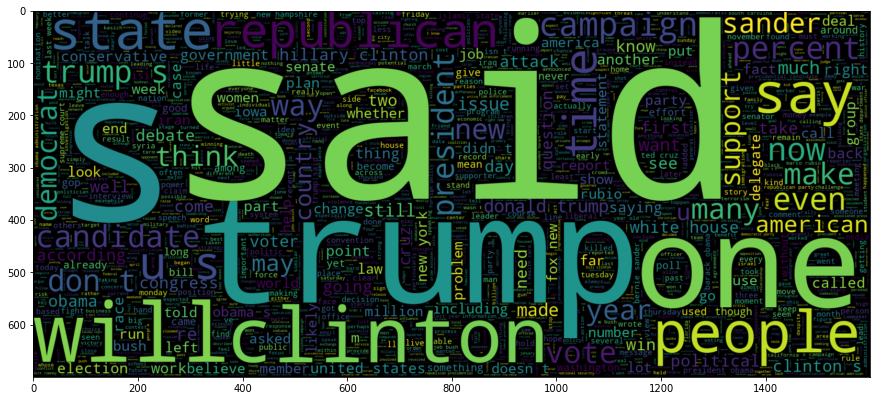

In [14]:
# word used in real news
plt.figure(figsize = (15,15))
wc=WordCloud(max_words = 2000, width=1600, height=700,stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label == 1].Article))
plt.imshow(wc,interpolation='bilinear')

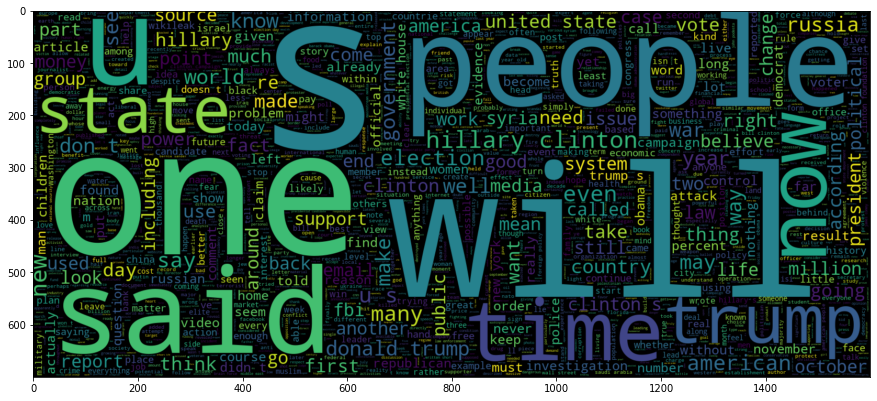

In [15]:
# word used in fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [16]:
Dataset2_true = pd.read_csv('True.csv')
Dataset2_fake = pd.read_csv('Fake.csv')

In [17]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [18]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [24]:
Dataset2_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [19]:
# counting by subject in real news
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
# Getting total rwos
print(f"total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
total Records:	21417


In [25]:
Dataset2_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [22]:
# Counting by subjects in fake news
for key,count in Dataset2_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
# Getting total rows 
print(f"total records:\t{Dataset2_fake.shape[0]}")
    

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
total records:	23481


C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


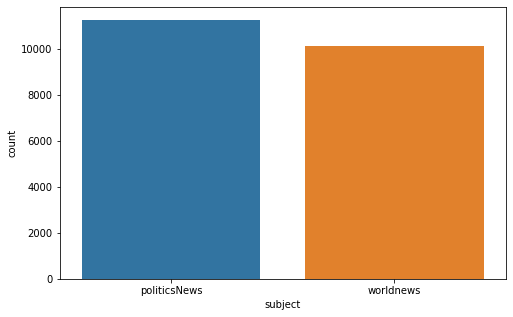

In [30]:
# Ploting the subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_true)
plt.show()

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


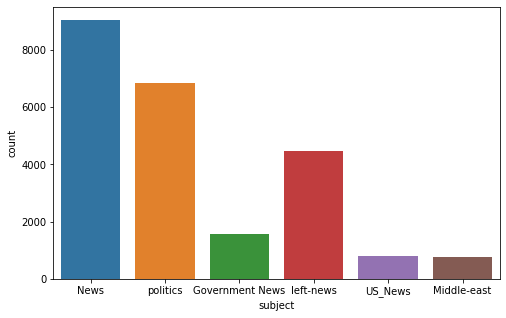

In [31]:
# ploting the subject in fake news
plt.figure(figsize=(8,5))
sns.countplot('subject', data=Dataset2_fake)
plt.show()

In [32]:
Dataset2_true['label'] = 1
Dataset2_fake['label'] = 0

In [34]:
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])

In [37]:
Dataset2.shape

(44898, 5)

In [38]:
Dataset2['Article'] = Dataset2['title'] + Dataset2['text']

In [39]:
Dataset2.sample(frac = 1)

,title,text,subject,date,label,Article
11977,A-LIST DEMOCRATS Attend Obama’s Last Taxpayer-...,Via: TMZOlivia Wilde posed for a black and whi...,politics,"Jan 7, 2017",0,A-LIST DEMOCRATS Attend Obama’s Last Taxpayer-...
21050,U.S. will circulate resolution on North Korea ...,NEW YORK (Reuters) - The U.S. envoy to the Uni...,worldnews,"September 4, 2017",1,U.S. will circulate resolution on North Korea ...
16496,"Brazil's Temer sent for tests, treatment for u...",SAO PAULO (Reuters) - Brazilian President Mich...,worldnews,"October 25, 2017",1,"Brazil's Temer sent for tests, treatment for u..."
21399,SWEDEN HOUSES 600+ MUSLIM REFUGEES In Luxury S...,Nothing but the best for soldiers of the calip...,left-news,"Oct 21, 2015",0,SWEDEN HOUSES 600+ MUSLIM REFUGEES In Luxury S...
13441,Israel strikes militant targets in Gaza after ...,JERUSALEM/GAZA (Reuters) - Israeli tanks and a...,worldnews,"November 30, 2017",1,Israel strikes militant targets in Gaza after ...
...,...,...,...,...,...,...
7765,Top GOP Governors Hold Emergency Conference C...,As Donald Trump continues to hold steady at nu...,News,"March 1, 2016",0,Top GOP Governors Hold Emergency Conference C...
20815,Catalonia parliament votes for Oct. 1 referend...,MADRID (Reuters) - Catalonia s parliament vote...,worldnews,"September 6, 2017",1,Catalonia parliament votes for Oct. 1 referend...
23022,"President Trump Fires Acting Attorney General,...",21st Century Wire says In a press release from...,Middle-east,"January 31, 2017",0,"President Trump Fires Acting Attorney General,..."
16110,BREAKING: YOU’RE FIRED! FBI DIRECTOR JAMES COM...,Wow! This is clearly something the White House...,Government News,"May 9, 2017",0,BREAKING: YOU’RE FIRED! FBI DIRECTOR JAMES COM...


In [40]:
Dataset2 = Dataset2.loc[:,['Article','label']]

In [41]:
Dataset2

,Article,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [42]:
# Applying the wordpre method to the dataset
Dataset2['Article'] = Dataset2['Article'].apply(wordpre)

In [43]:
Dataset2.head()

,Article,label
0,as u s budget fight looms republicans flip t...,1
1,u s military to accept transgender recruits o...,1
2,senior u s republican senator let mr muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much mor...,1


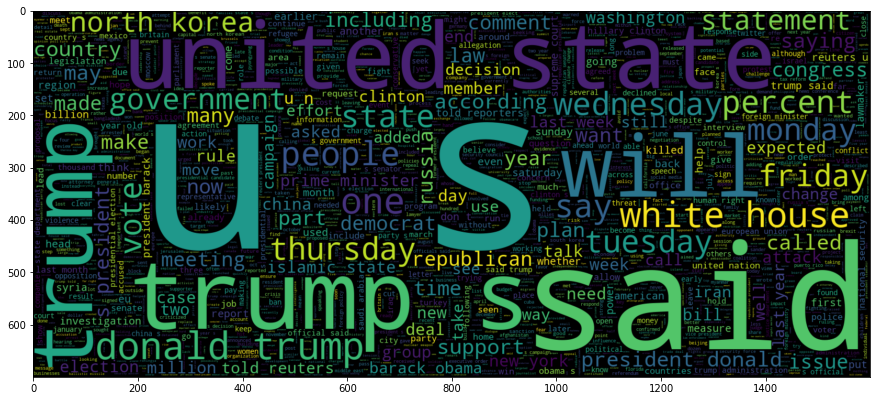

In [44]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

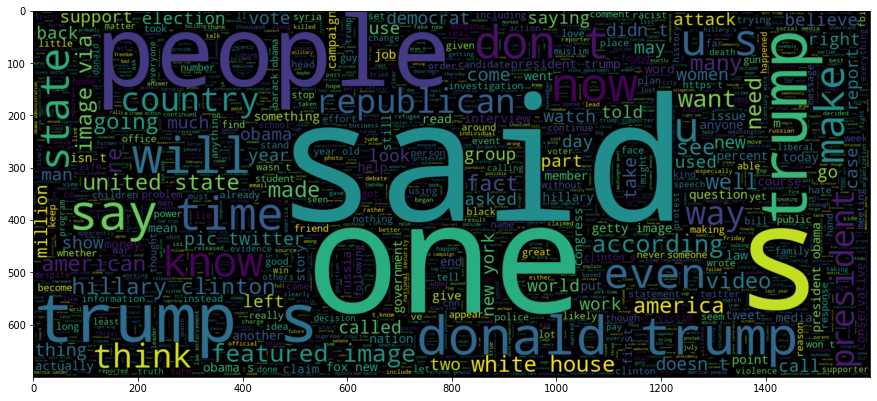

In [45]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [49]:
Dataset3_real = pd.read_csv('politifact_real.csv')
Dataset3_fake = pd.read_csv('politifact_fake.csv')

In [50]:
Dataset3_real['label']= 1
Dataset3_fake['label']= 0
Dataset3 = pd.concat([Dataset3_real, Dataset3_fake])
Dataset3["Article"] = Dataset3["title"]
Dataset3.sample(frac = 1) #Shuffle 100%
Dataset3 = Dataset3.loc[:,['Article','label']]

In [51]:
Dataset3

,Article,label
0,National Federation of Independent Business,1
1,comments in Fayetteville NC,1
2,"Romney makes pitch, hoping to close deal : Ele...",1
3,Democratic Leaders Say House Democrats Are Uni...,1
4,"Budget of the United States Government, FY 2008",1
...,...,...
427,Who is affected by the government shutdown?,0
428,Lindsey Graham Threatens To Convert To Democra...,0
429,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,0
430,Sarah Palin Calls To Boycott Mall Of America B...,0


In [52]:
# Applying the wordpre method to the dataset
Dataset3['Article'] = Dataset3['Article'].apply(wordpre)

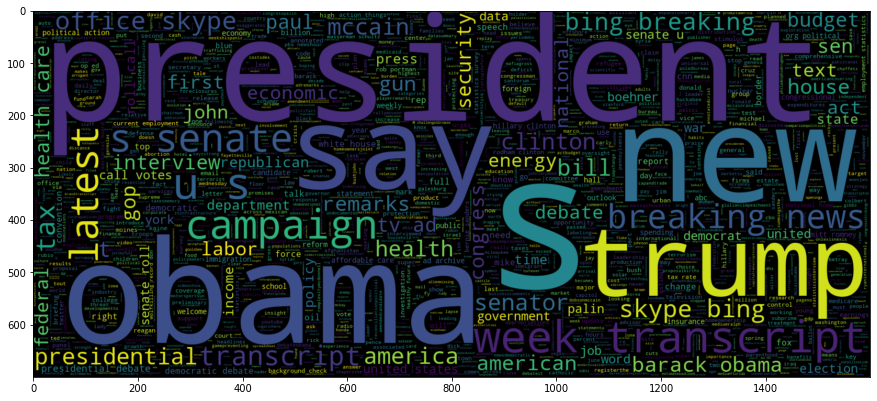

In [53]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

In [ ]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")